**Importing all the libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**loading the dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset/snsdata.csv")

In [ ]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**checking the shape of dataset**

In [ ]:
df.shape

(30000, 40)

**finding the details of each column**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

**DATA PRE-PROCESSING**

**Checking for null values**

In [ ]:
df.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0] *100 

gradyear         0.000000
gender           9.080000
age             16.953333
friends          0.000000
basketball       0.000000
football         0.000000
soccer           0.000000
softball         0.000000
volleyball       0.000000
swimming         0.000000
cheerleading     0.000000
baseball         0.000000
tennis           0.000000
sports           0.000000
cute             0.000000
sex              0.000000
sexy             0.000000
hot              0.000000
kissed           0.000000
dance            0.000000
band             0.000000
marching         0.000000
music            0.000000
rock             0.000000
god              0.000000
church           0.000000
jesus            0.000000
bible            0.000000
hair             0.000000
dress            0.000000
blonde           0.000000
mall             0.000000
shopping         0.000000
clothes          0.000000
hollister        0.000000
abercrombie      0.000000
die              0.000000
death            0.000000
drunk       

**counting the null values in column gender and age**

In [ ]:
NullCount={'Age':df['age'].isnull().sum(axis = 0),'Gender':df['gender'].isnull().sum(axis = 0)}
dm=pd.DataFrame(NullCount, index =['No.of missing values'])


In [ ]:
dm

,Age,Gender
No.of missing values,5086,2724


**keeping all the rows of age as null if age value is not between 13 and 20**

In [ ]:
df['age'].values[df['age'] > 20] = None
df['age'].values[df['age'] < 13] = None

**again checking for null values for age: which is increased**

In [ ]:
NullCount={'Age':df['age'].isnull().sum(axis = 0),'Gender':df['gender'].isnull().sum(axis = 0)}
dm=pd.DataFrame(NullCount, index =['No.of missing values'])
dm

,Age,Gender
No.of missing values,5523,2724


**doing dummy encoding for gender column by creating three seperate columns as:M,F,NaN**


In [ ]:
dummy=pd.get_dummies(df['gender'],dummy_na=True)
dummy

,F,M,NaN
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
29995,0,1,0
29996,0,1,0
29997,0,1,0
29998,0,1,0


In [ ]:
df=df.merge(dummy,left_index=True,right_index=True)
df.head(5)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,F,M,NaN
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [ ]:
df1=df

In [ ]:
df2=df

**Now filling the null values of age by putting the mean of the grad year**

In [ ]:
df1['age']=df1['age'].fillna(value=df1['age'].mean())

In [ ]:
df1

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,F,M,NaN
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df1.isnull().sum()

gradyear           0
gender          2724
age                0
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
F                  0
M                  0
NaN                0
dtype: int64

In [ ]:
df2.groupby('gradyear', as_index=False)['age'].mean()

,gradyear,age
0,2006,18.410351
1,2007,17.628673
2,2008,16.857860
3,2009,16.112831


**Here we are creating seperate dataframe for all gradyear and calculting their mean**

In [ ]:
df3=df2[df2["gradyear"]==2006]
df4=df2[df2["gradyear"]==2007]
df5=df2[df2["gradyear"]==2008]
df6=df2[df2
        ["gradyear"]==2009]

**we will replace all the null values in all rows of gradyear with their mean** 

In [ ]:
df3['age']=df3['age'].fillna(18.65586)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4['age']=df4['age'].fillna(17.70617)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df5['age']=df5['age'].fillna(16.76770)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df6['age']=df6['age'].fillna(15.81957)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Finally we will merge all the dataframes and this is our pre-processed dataset**

In [ ]:
data=pd.concat([df3,df4,df5,df6])

In [ ]:
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,clothes,hollister,abercrombie,die,death,drunk,drugs,F,M,NaN
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
NullCount={'Age':data['age'].isnull().sum(axis = 0),'Gender':data['gender'].isnull().sum(axis = 0)}
df=pd.DataFrame(NullCount, index =['No.of missing values'])
df

,Age,Gender
No.of missing values,0,2724


**AS gender is a categorical column we will drop it**

In [ ]:
final=data.drop(['gender'], axis = 1)
final

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,clothes,hollister,abercrombie,die,death,drunk,drugs,F,M,NaN
0,2006,18.982,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2006,18.801,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006,18.335,69,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2006,18.875,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2006,18.995,10,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,16.115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29996,2009,15.792,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29997,2009,15.784,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29998,2009,16.378,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
result1=final

**OBSERVATION1: with two features:friends and age**


In [ ]:
datasubset1=result1.loc[:,["age","friends"]]

**eps**: Two points are considered neighbors if the distance between the two points is below the threshold epsilon.


**min_samples**: The minimum number of neighbors a given point should have in order to be classified as a core point. It’s important to note that the point itself is included in the minimum number of samples.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.metrics import silhouette_score

**we will check for various values of episilon and min no of samples**

In [ ]:
dbscancluster1= DBSCAN(eps=3,min_samples=4)

In [ ]:
model1=dbscancluster1.fit(datasubset1)

In [ ]:
labels1=model1.labels_

**we will plot scatter plot to see the clusters formed for the two features**

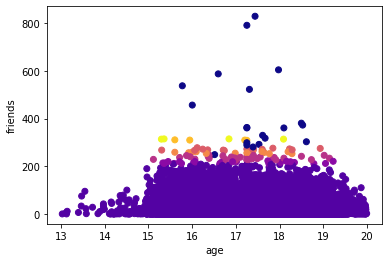

In [ ]:
plt.scatter(datasubset1['age'], datasubset1['friends'],c = labels1, cmap= "plasma") # plotting the clusters
plt.xlabel("age") # X-axis label
plt.ylabel("friends") # Y-axis label
plt.show() # showing the plot

In [ ]:
sample_cores=np.zeros_like(labels1,dtype=bool)

In [ ]:
sample_cores[dbscancluster1.core_sample_indices_]=True

In [ ]:
n_cluster=len(set(labels1))

In [ ]:
n_cluster

3

In [ ]:
silhouette_score(datasubset1,labels1)

0.8640279557256743

**OBSERVATION 2:with three features:friends,age and M**

In [ ]:
result1=final

In [ ]:
datasubset1=result1.loc[:,["age","friends","M"]]

In [ ]:
from sklearn.cluster import DBSCAN

**we also calculated the silhouette score**

In [ ]:
from sklearn.metrics import silhouette_score


** we will check for various values of epsilon and min_samples**

In [ ]:
dbscancluster1= DBSCAN(eps=3,min_samples=4)

In [ ]:
model1=dbscancluster1.fit(datasubset1)

In [ ]:
labels1=model1.labels_

**Then we also plot 3d scatter plot for the three features to see the clusters formed**

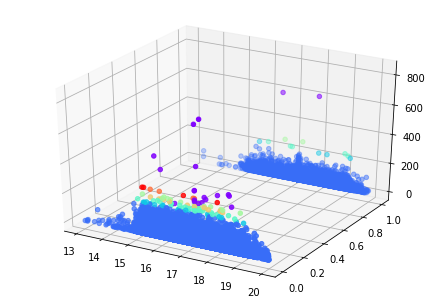

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(datasubset1['age'],datasubset1['M'], datasubset1['friends'],c = labels1, cmap= "rainbow")
plt.show()

In [ ]:
sample_cores=np.zeros_like(labels1,dtype=bool)

In [ ]:
sample_cores[dbscancluster1.core_sample_indices_]=True

In [ ]:
n_cluster=len(set(labels1))

In [ ]:
n_cluster

8

**we will calculate the silhouette score**

In [ ]:
silhouette_score(datasubset1,labels1)

0.7911667724019316

In [ ]:
dbscancluster2= DBSCAN(eps=4,min_samples=5)

In [ ]:
model2=dbscancluster1.fit(datasubset1)

In [ ]:
labels2=model2.labels_

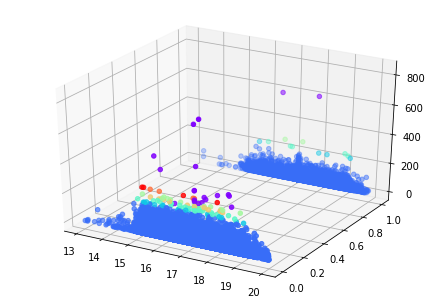

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(datasubset1['age'],datasubset1['M'], datasubset1['friends'],c = labels2, cmap= "rainbow")
plt.show()

In [ ]:
sample_cores=np.zeros_like(labels2,dtype=bool)

In [ ]:
n_cluster=len(set(labels2))

In [ ]:
n_cluster

8

In [ ]:
silhouette_score(datasubset1,labels2)

0.7911667724019316